# Teoría de grafos con python

## Introducción

El problema de los siete puentes de la ciudad de Königsberg, en la antigua Prusia oriental en el siglo XVIII, ciudad natal de Kant y, actualmente Kaliningrado (Rusia) es un célebre problema matemático que fue resuelto por Leonhard Euler en 1736 y dio origen a la Teoría de Grafos.

La ciudad estaba dividida en cuatro zonas por el río Pregel. Estas cuatro zonas estaban unidas por siete puentes. Los habitantes de la ciudad, durante sus paseos, intentaban encontrar una ruta que cruzase cada uno de los siete puentes una sola vez, y acabase en el mismo lugar que habían empezado.

Euler enfocó el problema representando las cuatro partes de tierra por un punto y cada uno de los siete puentes por una línea, uniendo los puntos que se corresponden. Entonces, el problema anterior se puede trasladar a la siguiente pregunta: ¿se puede recorrer el dibujo terminando en el punto de partida sin repetir las líneas?

El grafo asociado al problema de los puentes de Könisberg es el siguiente.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
plt.axis('off')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


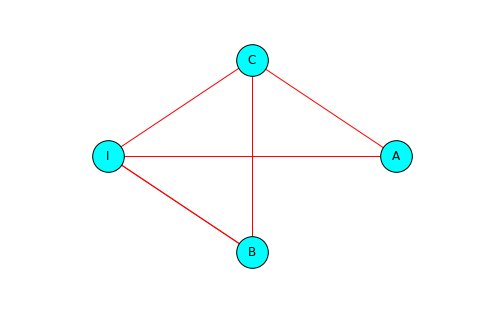

In [3]:
A = nx.MultiGraph()
A.add_node('A')
A.add_node('I')
A.add_node('B')
A.add_node('C')
A.add_edge('A','I')
A.add_edge('A','I')
A.add_edge('I','B')
A.add_edge('I','B')
A.add_edge('A','C')
A.add_edge('I','C')
A.add_edge('B','C')
nx.draw(A,node_color='cyan',node_size=1000, edge_color='red',pos=nx.circular_layout(A),
        with_labels=True)

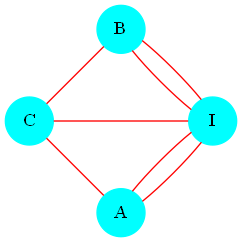

In [4]:
import nxpd
nx.set_node_attributes(A,'color','cyan')
nx.set_node_attributes(A,'shape','circle')
nx.set_node_attributes(A,'style','filled')
nx.set_edge_attributes(A,'color','red')
nxpd.draw(A,show='ipynb',layout='circo')

## Conceptos básicos

Definición 1.

Un grafo es un par G=(V,E) donde V es un conjunto finito no vacío cuyos elementos se llaman vértices o nodos y E es un conjunto cuyos elementos se llaman aristas o ejes.

Si las aristas son pares no ordenados de vértices de V, entonces diremos que el grafo G es no dirigido. En este caso denotamos las aristas por e={u,v} indicando que la arista e une los vértices u y v.

Si las aristas son pares ordenados de vértices de V, entonces diremos que el grafo G es dirigido o que es un digrafo. En este caso, denotamos las aristas por e=(u,v), indicando que la arista sale del vértice u y termina en el vértice v.

Si una arista une un vértice consigo mismo, recibe el nombre de lazo. Si un vértice no está conectado a ningún vértice, entonces se llama vértice aislado. Si un par de vértices están unidos por más de una arista, éstas reciben el nombre de aristas múltiples o paralelas.

Un grafo que admite lazos y aristas paralelas, se llama multigrafo, y si es dirigido, se llama multigrafo dirigido.

Un grafo sin aristas múltiples y sin lazos, se dice que es un grafo simple.


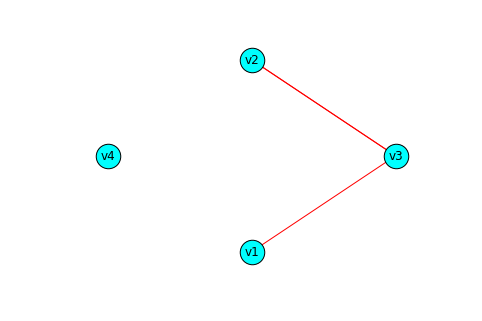

In [5]:
G=nx.MultiGraph({'v1':['v1','v2','v3'],'v2':['v3','v3'],'v4':[]})
nx.draw_circular(G,node_color='cyan',node_size=600,edge_color='red',with_labels=True)

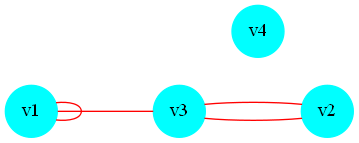

In [6]:
import nxpd
nx.set_node_attributes(G,'color','cyan')
nx.set_node_attributes(G,'shape','circle')
nx.set_node_attributes(G,'style','filled')
nx.set_edge_attributes(G,'color','red')
nxpd.draw(G,show='ipynb',layout='circo')

Definición 2

1) Un par de vértices u y v son adyacentes si existe una arista e que los une. Se dice entonces que e={u,v} incide en los vértices u y v, o que la arista conecta u y v, o que los vértices u y v son los extremos de la arista e.

2) El grado de un vértice, se denota por deg(v), es el número de aristas incidentes en v. Puesto que cada arista añade una unidad al grado del vértice en el que incide, por convenio, un lazo en v contribuye en 2 unidades al grado de v. Todos los vértices de grado 0 son aislados y los vértices de grado 1 se llaman hojas.

3) La sucesión de grados de G, $(deg(v))_{v\in V}$, es la sucesión formada por los grados de los vértices.

In [7]:
tuple(G.degree().values())

(3, 2, 0, 3)

Si G es un grafo con n vértices, |V|=n, se dice que G es grafo de orden n.
Si G es un grafo con m aristas, |E|=m, se dice que G es un grafo de tamaño m.

In [8]:
G.order()

4

In [9]:
G.size()

4

In [10]:
G.nodes()

['v3', 'v2', 'v4', 'v1']

In [11]:
G.edges()

[('v3', 'v2'), ('v3', 'v2'), ('v3', 'v1'), ('v1', 'v1')]

Definición 3

Si G es un grafo simple y todos sus vértices tienen grado r, se dice que G es un grafo r-regular.
Se dice que un grafo simple es completo, si cada vértice es adyacente a todos los demás. Un grafo completo de n vértices se denota por $K_n$.

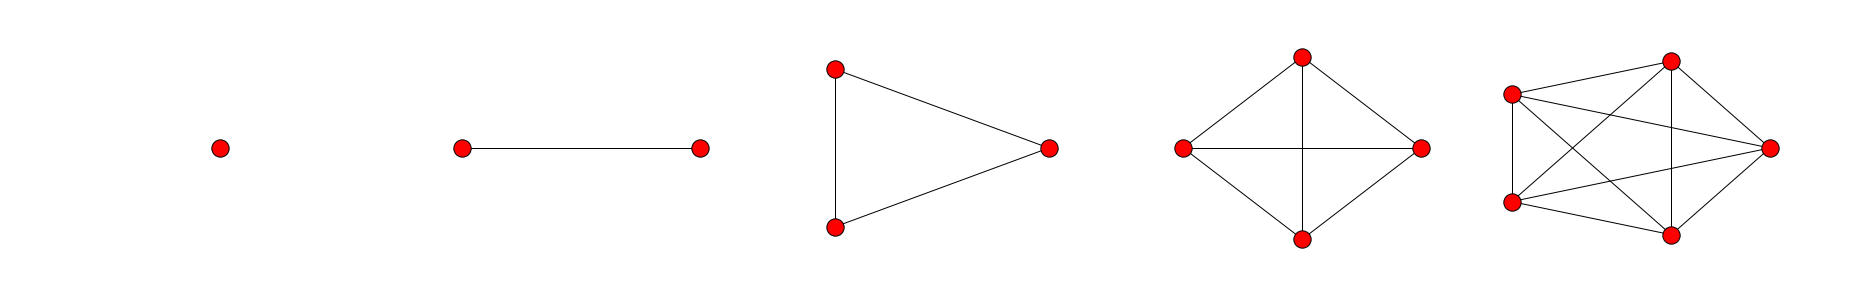

In [12]:
plt.subplots_adjust(left=0,right=5,bottom=0,top=0.95,wspace=0.01,hspace=1)
for i in range(1,6):
    plt.subplot(1,6,i+1)
    nx.draw_circular(nx.complete_graph(i))
show()

## Subgrafos

Definición 4

Sea G=(V,E) un grafo. Si G'=(V',E') es otro grafo donde $V'\subseteq V$ y $E'\subseteq E$, se dice que G' es un subgrafo de G. 

Si G=(V,E) es un grafo y $v\in V$, se denota por G-v al subgrafo de G que se obtiene al eliminar de G el vértice v y las aristas que inciden en el vértice v.

Si G=(V,E) es un grafo y $e\in E$, se denota por G-e al subgrafo de G que se obtiene al eliminar de G la arista e.

Si G=(V,E) es un grafo y $e\in E$, se denota por Ge al subgrafo de G que se obtiene al identificar los extremos de la arista.

In [13]:
G1=nx.complete_graph(5)
G2=G1.copy()
G2.remove_edges_from([(0,3),(2,4)])
G3=nx.contracted_edge(G1, (1, 3),self_loops=False)

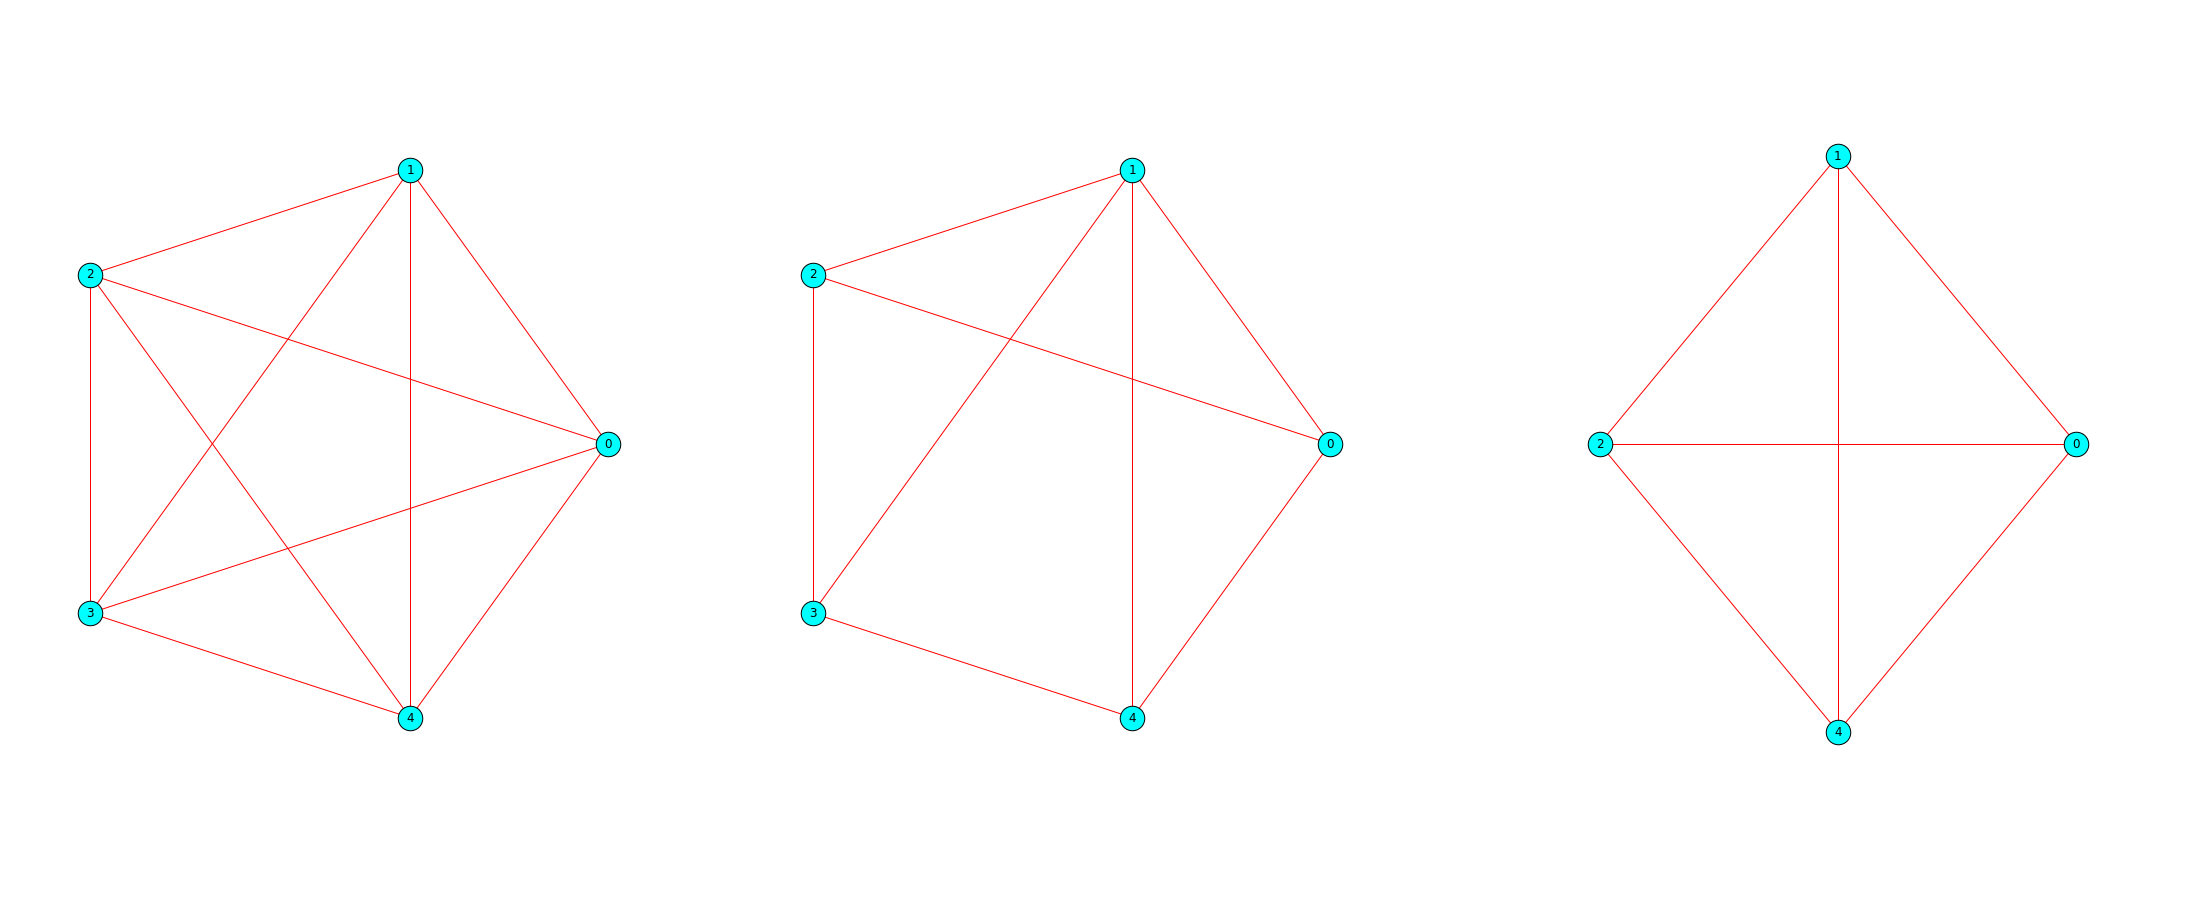

In [14]:
plt.subplots_adjust(left=0,right=5,bottom=0,top=3,wspace=0.01,hspace=1)
plt.subplot(1,3,1)
d1=nx.draw_circular(G1,node_color='cyan',node_size=600,edge_color='red',with_labels=True)
plt.subplot(1,3,2)
d2=nx.draw_circular(G2,node_color='cyan',node_size=600,edge_color='red',with_labels=True)
plt.subplot(1,3,3)
d3=nx.draw_circular(G3,node_color='cyan',node_size=600,edge_color='red',with_labels=True)
show()

Un grafo se representa por dibujos que pueden ser muy diferentes.

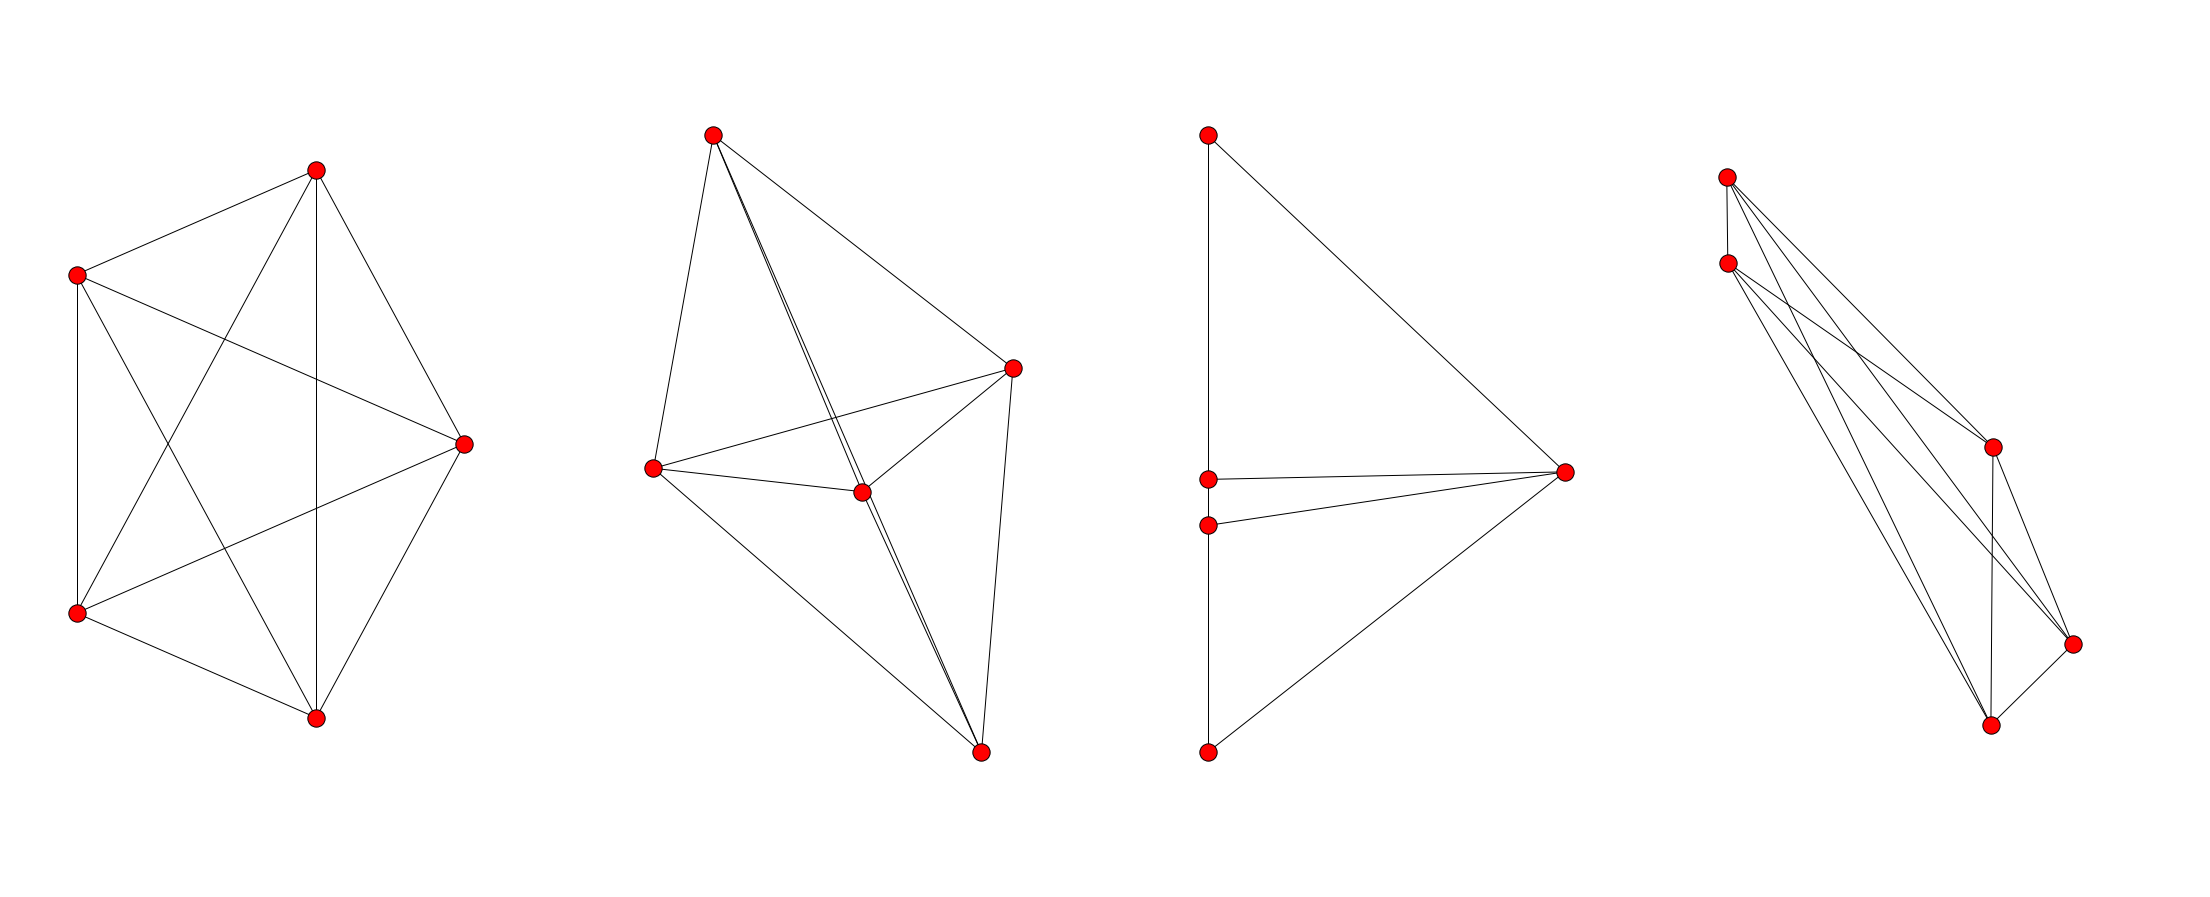

In [15]:
G=nx.complete_graph(5)
plt.subplots_adjust(left=0,right=5,bottom=0,top=3,wspace=0.01,hspace=1)
plt.subplot(1,4,1)
d1=nx.draw_circular(G)
plt.subplot(1,4,2)
d2=nx.draw_spring(G)
plt.subplot(1,4,3)
d3=nx.draw_spectral(G)
plt.subplot(1,4,4)
d4=nx.draw_random(G)
show()

Definición 5

Sea G=(V,E) y G'=(V',G') dos grafos. Se dice que G y G' son isomorfos si existen dos aplicaciones biyectivas $\phi:V\rightarrow V'$ y $\psi:E\rightarrow E'$ tales que
$$e=(u,v)\in E \Leftrightarrow \psi(e)=(\phi(u),\phi(v))\in E'$$

Vamos a construir todos los subgrafos de K4 salvo isomorfismos.

In [16]:
G=nx.complete_graph(4)

In [17]:
e=G.edges()

Creamos una lista con todos los subconjuntons (pasados a lista) del conjunto de lados de G. Para cada lista, iremos creando un grafo eliminando los lados del grafo original que están en esa lista. Para no tener que definir una función que nos dé los subconjuntos de un conjunto, usaremos la que hay definida en sympy

In [18]:
from sympy import subsets
sub=[list(x) for x in list(subsets(e))]

In [20]:
H=[]
for ls in sub:
    Gt=G.copy();
    Gt.remove_edges_from(ls);
    H.append(Gt);
len(H)

64

Tenemos un total de 64 subgrafos de K4 con 4 vértices. Ahora los clasificamos por clases de equivalencia, donde la relación de equivalencia que consideramos es ser isomorfo.

In [21]:
clases=[]
while H!=[]:
    c=[h for h in H if nx.is_isomorphic(H[0],h)]
    clases.append(c)
    H=[h for h in H if not(h in c)]
len(clases)

11

Por último, pintamos los 11 que nos salen.

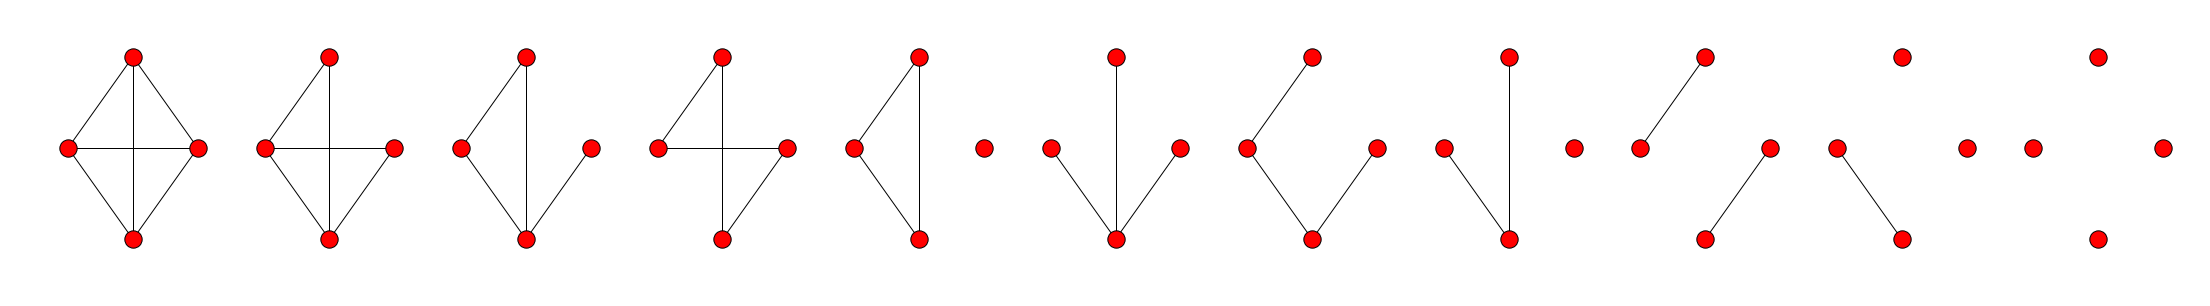

In [23]:
plt.subplots_adjust(left=0,right=5,bottom=0,top=0.95,wspace=0.01,hspace=1)
for i in range(11):
    plt.subplot(1,11,i+1)
    nx.draw_circular(clases[i][0])
show()

Definición 6

Sea G=(V,E) un grafo, con $V=\{v_1,\ldots,v_n\}$. La matriz de adyacencia de G es la matriz $A=(a_{ij})$ cuadrada de orden n, cuyo elemento $a_{ij}$ es el número de aristas que unen el vértice $v_i$ con el vértice $v_j$, para $i,j=1,\ldots ,n$. 

In [18]:
A=nx.adjacency_matrix(G1)
A.todense()

matrix([[0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 1, 1],
        [0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 0, 0]], dtype=int32)

In [19]:
import numpy
A=numpy.matrix([[0,1,0,1,1],[1,0,1,1,1],[0,1,0,0,0],[1,1,0,0,0],[1,1,0,0,0]])
G=nx.from_numpy_matrix(A)

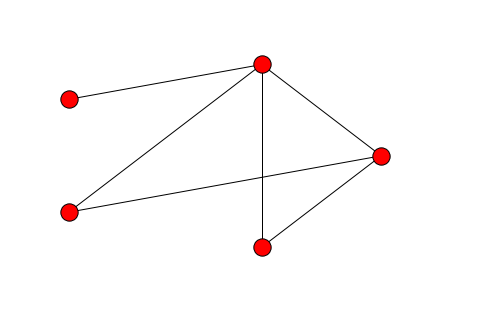

In [20]:
nx.draw_circular(G)

## Caminos y ciclos

Definición 7

Sea G=(V,E) un grafo.
(i) Un camino de un vértice v a un vértice w es una sucesión de aristas (no necesariamente distintas) de G de la forma
$$
e_1=\{v_0,v_1\},e_2=\{v_1,v-2\},\ldots,e_n=\{v_{n-1},v_n\},
$$
con $v_0=v$ y $v_n=w$. El vértice $v_0$ se llama vértice inicial y $v_n$  se llama el vértice final del camino; el número de aristas n se llama la longitud del camino.

(ii) Un camino de longitud $\geq 1$, en el que $v_0=v_n$ recibe el nombre de camino cerrado.

(iii) Un camino en el que todas las aristas son distintas se llama camino simple.

In [21]:

list(nx.all_simple_paths(G,0,3))

[[0, 1, 3], [0, 3], [0, 4, 1, 3]]

In [22]:

H = G.to_directed()
[i for i in nx.simple_cycles(H) if len(i)>2]

[[0, 4, 1, 3], [0, 4, 1], [0, 3, 1, 4], [0, 3, 1], [0, 1, 4], [0, 1, 3]]

Definición 8

Un grafo $G$ es conexo si para cada par de vértices $v$ y $w$ existe un camino de $v$ a $w$.

In [23]:
G = nx.path_graph(4)
print(nx.is_connected(G))

True


## Grafos de Euler y Hamilton

Definición 9

Sea G un grafo, un circuito euleriano es un camino simple cerrado que contiene todas las aristas de G. 
Un grafo que admite un circuito euleriano se denomina grafo euleriano.

Un camino de Euler es un camino simple en el que aparecen todas las aristas.


In [24]:
K5=nx.complete_graph(5)
nx.is_eulerian(K5)

True

In [25]:
list(nx.eulerian_circuit(K5))

[(0, 4),
 (4, 3),
 (3, 2),
 (2, 4),
 (4, 1),
 (1, 3),
 (3, 0),
 (0, 2),
 (2, 1),
 (1, 0)]

In [26]:
def eulerian_path(G):
    """Returns the edges of an Eulerian path in G, (if it exits).
    An Eulerian path is a path that crosses every edge in G
    exactly once.
    Parameters
    ----------
    G: NetworkX Graph, DiGraph, MultiGraph or MultiDiGraph 
        A directed or undirected Graph or MultiGraph.
    Returns
    -------
    edges: generator
        A generator that produces edges in the Eulerian path.
    Raises
    ------
    NetworkXError: If the graph does not have an eulerian path.
    Notes
    -----
    Linear time algorithm, adapted from [1]_ and [3]_.
    Information about euler paths in [2]_.
    Code for eulerian circuit in [3]_.
    Important: In [1], euler path is in reverse order,
    this implementation gives the path in correct order
    as in [3]_ for eulerian_circuit. The distinction for 
    directed graph is in using the in_degree neighbors, not the out
    ones. for undirected, it is using itemgetter(1) for get_vertex, 
    which uses the correct vertex for this order. Also, every graph
    has an even number of odd vertices by the Handshaking Theorem [4]_. 
    References
    ----------
    .. [1] http://www.graph-magics.com/articles/euler.php
    .. [2] http://en.wikipedia.org/wiki/Eulerian_path
    .. [3] https://github.com/networkx/networkx/blob/master/networkx/algorithms/euler.py
    .. [4] https://www.math.ku.edu/~jmartin/courses/math105-F11/Lectures/chapter5-part2.pdf
    
    Examples 
    --------
    >>> G = nx.Graph([('W', 'N'), ('N', 'E'), ('E', 'W'), ('W', 'S'), ('S', 'E')])
    >>> list(nx.find_eulerian_path(G))
    [('W', 'N'), ('N', 'E'), ('E', 'W'), ('W', 'S'), ('S', 'E')]
    >>> G = nx.Digraph([(1, 2), (2, 3)])
    >>> list(nx.find_eulerian_path(G))
    [(1,2),(2,3)]
    """
    from operator import itemgetter 

    # Verify that graph is connected, short circuit
    if G.is_directed() and not nx.is_weakly_connected(G):
        raise nx.NetworkXError("G is not connected.")    

    # is undirected
    if not G.is_directed() and not nx.is_connected(G):
        raise nx.NetworkXError("G is not connected.")

    # Now verify if has an eulerian circuit: even condition of all nodes is satified.
    if nx.is_eulerian(G):
        x = nx.eulerian_circuit(G) # generator of edges
        for i in x:
            yield i
        
    # Not all vertex have even degree, check if exactly two vertex have odd degrees.
    # If yes, then there is an Euler path. If not, raise an error (no euler path can be found)
    else:
        g = G.__class__(G)  # copy graph structure (not attributes)
        
        # list to check the odd degree condition, and a flag
        check_odd = []
        directed = False
    
        if g.is_directed():
            degree = g.in_degree
            out_degree = g.out_degree
            edges = g.in_edges_iter
            get_vertex = itemgetter(0)
            directed = True
        else:
            degree = g.degree
            edges = g.edges_iter
            get_vertex = itemgetter(1)
            
        # Verify if an euler path can be found. Complexity O(n) ?
        for vertex in g.nodes():
            deg = degree(vertex)
            # directed case
            if directed:
                outdeg = out_degree(vertex)
                if deg != outdeg:
                    # if we have more than 2 odd nodes, we do a raise (no euler path)
                    if len(check_odd) > 2:
                        raise nx.NetworkXError("G doesn't have an Euler Path.")
                # is odd and we append it. 
                    else:
                        check_odd.append(vertex)
            # undirected case        
            else:
                if deg % 2 != 0:
                    # if we have more than 2 odd nodes, we do a raise (no euler path)
                    if len(check_odd) > 2:
                        raise nx.NetworkXError("G doesn't have an Euler Path.")
                    # is odd and we append it. 
                    else:
                        check_odd.append(vertex)

        if directed:
            def verify_odd_cond(g,check_odd):
                first = check_odd[0]
                second = check_odd[1]
                if  g.out_degree(first) == g.in_degree(first) + 1 and \
                g.in_degree(second) == g.out_degree(second) + 1:
                    return second
                elif g.out_degree(second) == g.in_degree(second) + 1 and \
                g.in_degree(first)  == g.out_degree(first) + 1:
                    return first
                else:
                    return None
            start = verify_odd_cond(g,check_odd)
        else:
            start = check_odd[0]

        # if the odd condition is not meet, raise an error.
        if not start:
            raise nx.NetworkXError("G doesn't have an Euler Path")
        # Begin algorithm: 
        vertex_stack = [start]
        last_vertex = None

        while vertex_stack:

            current_vertex = vertex_stack[-1] #(4)
            # if no neighbors:
            if degree(current_vertex) == 0:
                # Special case, we cannot add a None vertex to the path.
                if last_vertex is not None:
                    yield (last_vertex, current_vertex)
                last_vertex = current_vertex
                vertex_stack.pop()
            # we have neighbors, so add the vertex to the stack (2), take any of its neighbors (1)
            # remove the edge between selected neighbor and that vertex,
            # and set that neighbor as the current vertex (4).
            else:
                random_edge = next(edges(current_vertex)) #(1)
                vertex_stack.append(get_vertex(random_edge)) #(2)
                g.remove_edge(*random_edge) #(3)


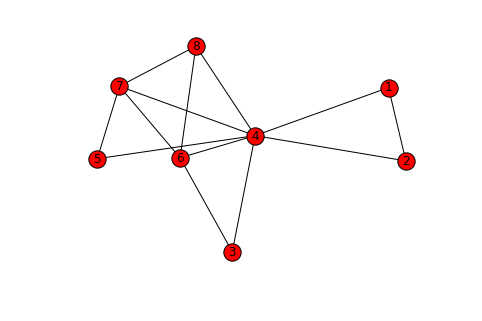

In [27]:
G=nx.Graph({1:[2,4],2:[4],3:[4,6],4:[5,6,7,8],5:[7],6:[7,8],7:[8]})
nx.draw_spring(G,with_labels=True)

In [28]:
sorted(G.degree().values())

[2, 2, 2, 2, 3, 4, 4, 7]

In [29]:
list(eulerian_path(G))

[(8, 7),
 (7, 6),
 (6, 4),
 (4, 7),
 (7, 5),
 (5, 4),
 (4, 8),
 (8, 6),
 (6, 3),
 (3, 4),
 (4, 2),
 (2, 1),
 (1, 4)]

Definición 10

Un ciclo hamiltoniano de un grafo G es un camino simple cerrado que recorre todos los vértices una sola vez.

Un grafo es hamiltoniano si tiene un ciclo hamiltoniano.

Un camino de Hamilton es un camino simple que recorre todos los vértices una sola vez. 


In [30]:
def hamilton_cycles(G):
    H=G.to_directed()
    L=nx.simple_cycles(H)
    C=[i for i in L if len(i)==len(G)]
    for i in C:
        i.append(G.nodes()[0])
    return C 

In [31]:
def hamilton_paths(G,source,target):
    L=nx.all_simple_paths(G,source,target)
    C=[i for i in L if len(i)==len(G)]
    return C  

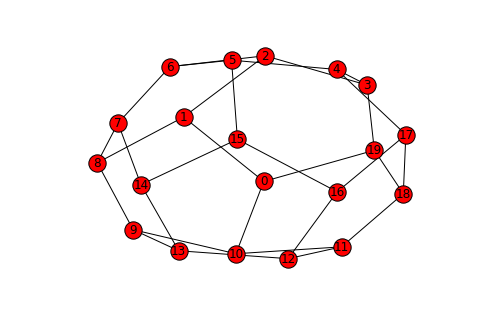

In [32]:
G=nx.dodecahedral_graph()
nx.draw(G,with_labels=True)

In [33]:
hamilton_cycles(G)

[[0, 19, 3, 4, 5, 15, 14, 13, 12, 16, 17, 18, 11, 10, 9, 8, 7, 6, 2, 1, 0],
 [0, 19, 3, 4, 5, 15, 14, 7, 6, 2, 1, 8, 9, 13, 12, 16, 17, 18, 11, 10, 0],
 [0, 19, 3, 4, 5, 15, 16, 17, 18, 11, 12, 13, 14, 7, 6, 2, 1, 8, 9, 10, 0],
 [0, 19, 3, 4, 5, 6, 2, 1, 8, 7, 14, 15, 16, 17, 18, 11, 12, 13, 9, 10, 0],
 [0, 19, 3, 4, 17, 18, 11, 12, 16, 15, 5, 6, 2, 1, 8, 7, 14, 13, 9, 10, 0],
 [0, 19, 3, 4, 17, 18, 11, 10, 9, 8, 7, 14, 13, 12, 16, 15, 5, 6, 2, 1, 0],
 [0, 19, 3, 2, 6, 7, 14, 13, 12, 16, 15, 5, 4, 17, 18, 11, 10, 9, 8, 1, 0],
 [0, 19, 3, 2, 6, 5, 4, 17, 18, 11, 10, 9, 13, 12, 16, 15, 14, 7, 8, 1, 0],
 [0, 19, 3, 2, 1, 8, 7, 6, 5, 4, 17, 18, 11, 12, 16, 15, 14, 13, 9, 10, 0],
 [0, 19, 3, 2, 1, 8, 9, 13, 12, 16, 15, 14, 7, 6, 5, 4, 17, 18, 11, 10, 0],
 [0, 19, 18, 17, 4, 3, 2, 6, 5, 15, 16, 12, 11, 10, 9, 13, 14, 7, 8, 1, 0],
 [0, 19, 18, 17, 4, 3, 2, 1, 8, 9, 13, 14, 7, 6, 5, 15, 16, 12, 11, 10, 0],
 [0, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [0, 19, 18,

## Grafos planos

Definición 11

Un grafo se dice que es plano si admite una representación gráfica en el plano de modo que cada 
arista corta únicamente a otra arista en un vértice que sea extremo de ambas. 

In [34]:
import itertools as it
from networkx.algorithms import bipartite

In [35]:
def is_planar(G):
    """
    function checks if graph G has K(5) or K(3,3) as minors,
    returns True /False on planarity"
    """
    result=True
    n=G.order() 
    if n>5:
        for subnodes in it.combinations(G.nodes(),6):
            subG=G.subgraph(subnodes)
            if bipartite.is_bipartite(G):# check if the graph G has a subgraph K(3,3)
                X, Y = bipartite.sets(G)
                if len(X)==3:
                    result=False
    if n>4 and result:
        for subnodes in it.combinations(G.nodes(),5):
            subG=G.subgraph(subnodes)
            if subG.size()==10: # check if the graph G has a subgraph K(5)
                result=False
    return result 


In [36]:
is_planar(G)

True

In [37]:
import planarity

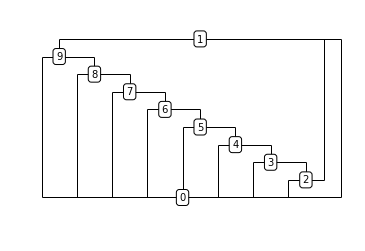

In [38]:
plt.axis('off')
G=nx.wheel_graph(10) 
planarity.draw(G)


## Coloración de grafos

Definición 12

Sea $G$ un grafo y $x\in\mathbb{N}$. Vamos a denotar por $p(G, x)$ al número de coloraciones distintas, 
con $x$ colores, que tiene el grafo $G$. Lo denominaremos el polinomio cromático de $G$.
 

In [39]:
from sympy import *
x=Symbol("x")
def chromatic_polynomial(G,x):
    lados=G.edges();
    if len(lados)==0:
        return x**len(G.nodes());
    l=lados[0];
    Gl=G.copy();
    Gl.remove_edges_from([l]);
    Glp=nx.contracted_edge(G,l,self_loops=False)
    return chromatic_polynomial(Gl,x)-chromatic_polynomial(Glp,x);

In [40]:
K5=nx.complete_graph(5)
chromatic_polynomial(K5,x)

x**5 - 10*x**4 + 35*x**3 - 50*x**2 + 24*x

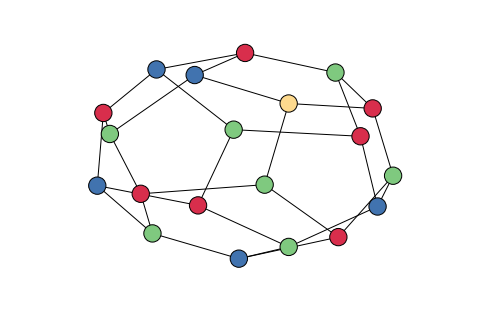

In [41]:
G = nx.dodecahedral_graph()
from matplotlib import colors,cm
coloring=nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_largest_first)
node_color=[colors.rgb2hex(cm.Accent(200*coloring[i]%256)) for i in G.nodes()]
nx.draw(G, node_color=node_color)

Definición 13

El número cromático $\chi(G)$ de un grafo $G$ es el número mínimo de colores que se requieren 
para una coloración de $G$. 

In [42]:
def chromatic_number(G):
    if G.number_of_nodes() == 0:
        return 0
    elif G.number_of_edges() == 0:
        return 1
    elif G.number_of_edges() == 1:
        return 2
    else:
        p = chromatic_polynomial(G,x)
        for i in range(max(G.degree().values()) + 2):
            if p.subs(x, i) > 0:
                return i

In [43]:
chromatic_number(K5)

5

## Árboles

Definición 14

Un árbol es un grafo conexo sin ciclos. 

Dado un grafo conexo, un subgrafo suyo se dice árbol generador si tiene todos los vértices y es un
árbol. 

In [44]:
def hierarchy_pos(G, root, width=0.5, vert_gap=0.1, vert_loc=0, xcenter=0.5):
    '''If there is a cycle that is reachable from root, then result will not be a hierarchy.
       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
    '''

    def h_recur(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5,
                  pos=None, parent=None, parsed=[]):
        if(root not in parsed):
            parsed.append(root)
            if pos == None:
                pos = {root:(xcenter, vert_loc)}
            else:
                pos[root] = (xcenter, vert_loc)
            neighbors = G.neighbors(root)
            if parent != None:
                neighbors.remove(parent)
            if len(neighbors) != 0:
                dx = width / len(neighbors)
                nextx = xcenter - width / 2 - dx / 2
                for neighbor in neighbors:
                    nextx += dx
                    pos = h_recur(G, neighbor, width=dx, vert_gap=vert_gap,
                            vert_loc=vert_loc - vert_gap, xcenter=nextx, pos=pos,
                            parent=root, parsed=parsed)
        return pos

    return h_recur(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5)

In [45]:
k5=nx.complete_graph(5)

In [46]:
t=nx.minimum_spanning_tree(k5)

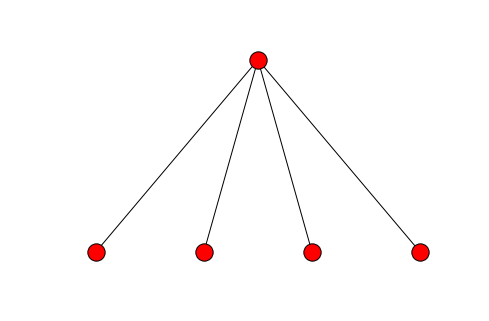

In [47]:
nx.draw(t,pos=hierarchy_pos(t,0))

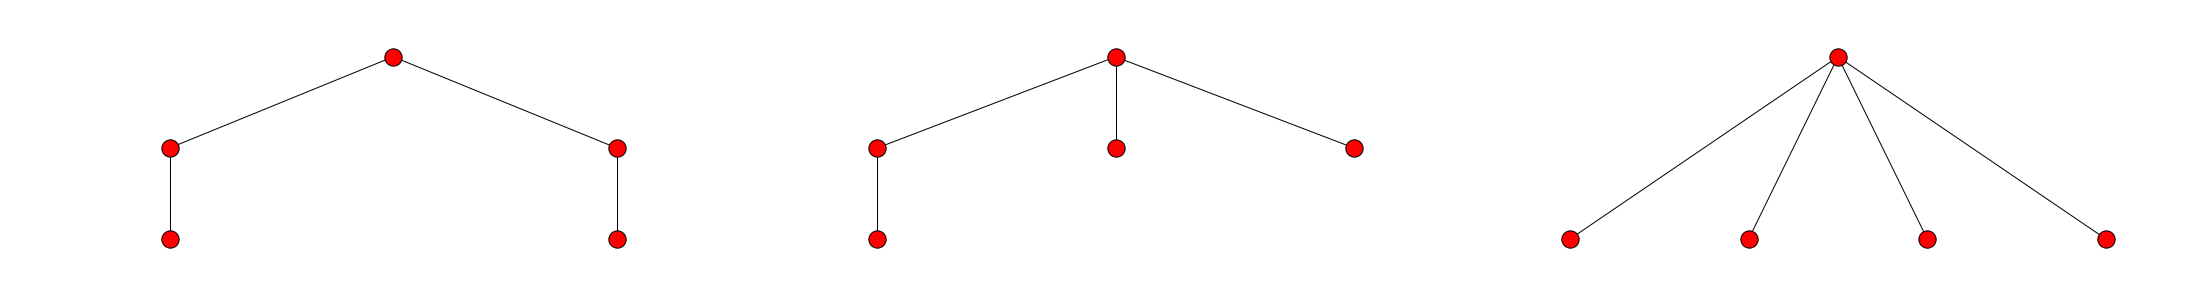

In [48]:
L=list(nx.nonisomorphic_trees(5))
plt.subplots_adjust(left=0,right=5,bottom=0,top=0.95,wspace=0.01,hspace=1)
for i in range(3):
    plt.subplot(1,3,i+1)
    nx.draw(L[i],pos=hierarchy_pos(L[i],0))
show()

## Grafos ponderados

Definición 15

Un grafo simple G = (V, E) diremos que es un grafo ponderado si tiene asociado una función $w : E\rightarrow \mathbb{R}$ llamada función de ponderación.
La imagen de cada arista $w(e)$ es llamada el peso de la arista e.

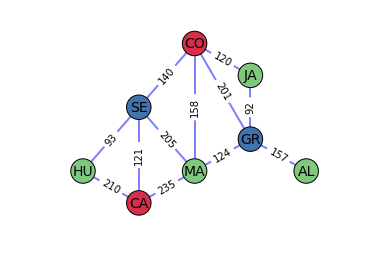

In [49]:
from matplotlib import cm,colors
G = nx.Graph()
G.add_weighted_edges_from([('AL','GR',157),('GR','JA',92),('GR','CO',201),
                  ('GR','MA',124),('CO','MA',158),('CO','JA',120),
                  ('CO','SE',140),('MA','SE',205),('MA','CA',235),
                  ('SE','CA',121),('SE','HU',93),('CA','HU',210)])
pos={'AL':(5,1),'GR':(4,1.5),'JA':(4,2.5),'MA':(3,1),'CO':(3,3),'SE':(2,2),'CA':(2,0.5),
     'HU':(1,1)}
coloring=nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_largest_first)
node_color=[colors.rgb2hex(cm.Accent(200*coloring[i]%256)) for i in G.nodes()]
nx.draw_networkx_nodes(G,pos=pos,node_size=600,node_color=node_color)
nx.draw_networkx_labels(G,pos=pos,font_size=14)
nx.draw_networkx_edges(G,pos=pos,width=2,alpha=0.5,edge_color='blue')
edge_labels=nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=edge_labels)
plt.axis('off')
plt.show()


In [50]:
nx.shortest_path(G,source='GR',target='CA',weight='weight')

['GR', 'MA', 'CA']

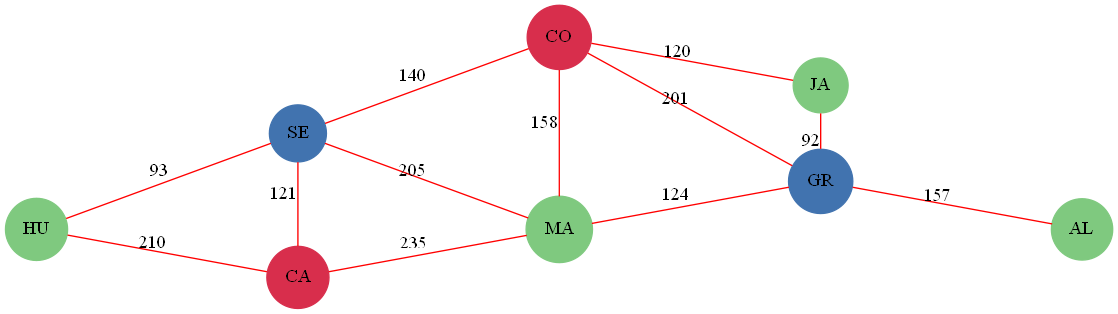

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm,colors
G=nx.Graph(ratio='0.25')
G.add_weighted_edges_from([('AL','GR',157),('GR','JA',92),('GR','CO',201),
                  ('GR','MA',124),('CO','MA',158),('CO','JA',120),
                  ('CO','SE',140),('MA','SE',205),('MA','CA',235),
                  ('SE','CA',121),('SE','HU',93),('CA','HU',210)])
pos={'AL':'5,1!','GR':'4,1.5!','JA':'4,2.5!','MA':'3,1!','CO':'3,3!','SE':'2,2!',
     'CA':'2,0.5!','HU':'1,1!'}
coloring=nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_largest_first)
node_color=[colors.rgb2hex(cm.Accent(200*coloring[i]%256)) for i in G.nodes()]
colours=dict(zip(G.nodes(),node_color))
nx.set_node_attributes(G,'pos',pos)
nx.set_node_attributes(G,'color',colours)
nx.set_node_attributes(G,'shape','circle')
nx.set_node_attributes(G,'style','filled')
nx.set_edge_attributes(G,'color','red')
edge_labels=nx.get_edge_attributes(G,'weight')
nx.set_edge_attributes(G,'label',edge_labels)
nxpd.draw(G,show='ipynb',layout='neato')

## Grafos bipartidos

Definición 16

Un grafo bipartido es un grafo donde el conjunto de vértices $V$ tiene una partición 
$\{V_1, V_2\}$ 
($V_G=V_1\cup V_2$, $V_1\cap V_2=\emptyset$) tal que toda arista conecta un vértice 
de $V_1$ con un vértice de $V_2$.

Un grafo bipartido completo es un grafo bipartido tal que todo vértice de $V_1$ está conectado 
a todo vértice de $V_2$ mediante una única arista. 

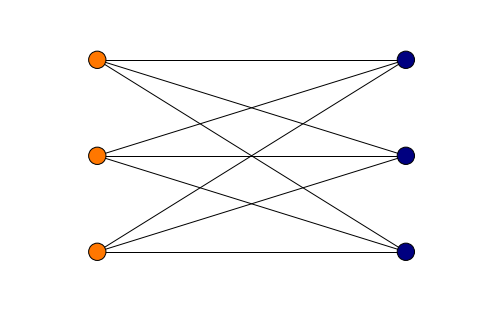

In [52]:
from networkx.algorithms import bipartite
G = nx.complete_bipartite_graph(3, 3)
coloring=bipartite.color(G)
node_color=[colors.rgb2hex(cm.jet(200*coloring[i]%256)) for i in G.nodes()]
X, Y = bipartite.sets(G) 
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G,pos=pos,node_color=node_color)